In [3]:
import pandas as pd
import os
import librosa
import librosa.display
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt
import time

import tensorflow as tf



In [2]:
# https://towardsdatascience.com/cnns-for-audio-classification-6244954665ab
# https://mikesmales.medium.com/sound-classification-using-deep-learning-8bc2aa1990b7

In [20]:
fulldatasetpath = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_train/sample_2'
#fulldatasetpath = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/PA/ASVspoof2019_PA_train/flac'
labels_path = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt'



### from matlab code for cqt
    # %         x         : input signal
    # %         B         : number of bins per octave
    # %         fs        : sampling frequency
    # %         fmin      : lowest frequency to be analyzed
    # %         fmax      : highest frequency to be analyzed
    # %         varargin  : Optional input pairs (see table below)

    # %         x         : audio signal
    # %         B         : 96
    # %         fs        : sampling rate
    # %         fmin      : fmax/2**9
    # %         fmax      : samplin grate//2
    # %         varargin  : 'rasterize', 'full', 'gamma', gamma

In [17]:
def extract_features(filename):
    try:
#         print(fulldatasetpath + '/' +filename)
        y, sr = librosa.load(fulldatasetpath + '/' +filename)
        
#         B = 96
#         fmax = sample_rate/2
#         fmin = fmax/2**9
    
        #cqt = librosa.feature.chroma_cqt(y=audio, sr=sample_rate,fmin = fmin , bins_per_octave=B)
        cqt = np.abs(librosa.cqt(y, sr=sr))
#         audio, sample_rate = librosa.load(fulldatasetpath + '/' +filename, res_type='kaiser_fast') 
#         mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
#         mfccsscaled = np.mean(mfccs.T,axis=0)
        
        
    except Exception as e:
        print("Error encountered while parsing file: ", filename)
        return None 
     
    return cqt,sr
#     return mfccs
    
    

In [16]:
pa_train_labels = '/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/PA/ASVspoof2019_PA_cm_protocols/ASVspoof2019.PA.cm.train.trn.txt'

labels = pd.read_csv(pa_train_labels, delimiter = " ", header=None)
labels.columns = ['SPEAKER_ID','AUDIO_FILE_NAME','ENVIRONMENT_ID','ATTACK_ID','KEY']
labels

,SPEAKER_ID,AUDIO_FILE_NAME,ENVIRONMENT_ID,ATTACK_ID,KEY
0,PA_0079,PA_T_0000001,aaa,-,bonafide
1,PA_0079,PA_T_0000002,aaa,-,bonafide
2,PA_0079,PA_T_0000003,aaa,-,bonafide
3,PA_0079,PA_T_0000004,aaa,-,bonafide
4,PA_0079,PA_T_0000005,aaa,-,bonafide
...,...,...,...,...,...
53995,PA_0098,PA_T_0053996,ccc,CC,spoof
53996,PA_0098,PA_T_0053997,ccc,CC,spoof
53997,PA_0098,PA_T_0053998,ccc,CC,spoof
53998,PA_0098,PA_T_0053999,ccc,CC,spoof


## On example file from training dataset

/Users/asimadnan/Desktop/Mres/ASVSPOOF_DATA/LA/ASVspoof2019_LA_train/sample/LA_T_2361751.flac


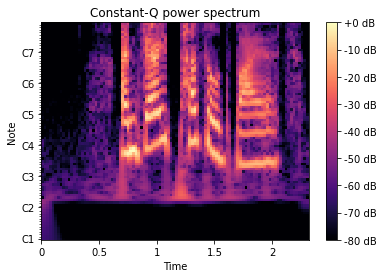

In [10]:
filename = 'LA_T_2361751.flac'
a,sr = extract_features(filename)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(a, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

## Issue
if input shape is 12 by X, where X is variable ans 12 is contact for all files. if i use the above paramneters taken from matlab code.
we cannot make a CNN with more than 2 pooling layers, the dimesnions go into negitve becuase we only have 12 row available.
But looking at the examples of CQT in documentation, these give dimesnion of (84, 79), (60, 79) and (120, 79) which might be more suitable for a CNN.
using the last example from doc for this cnn


/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


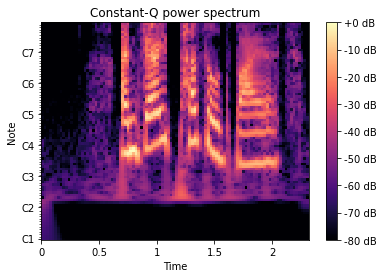

In [9]:
# ax = sns.heatmap(a)
# plt.title('HeatMap of CQT')
# plt.show()



### same example file, using paramters from librosa cqt document

/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


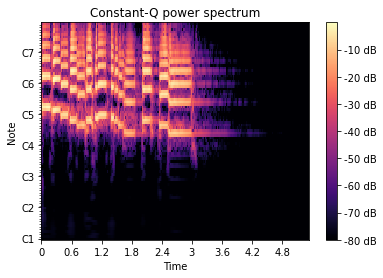

In [18]:
y, sr = librosa.load(librosa.ex('trumpet'))
C = np.abs(librosa.cqt(y, sr=sr))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [19]:
C

array([[1.7063910e-04, 1.6211723e-04, 1.4026951e-04, ..., 4.3958481e-09,
        4.7128452e-09, 4.8903219e-09],
       [2.1289077e-04, 2.1353790e-04, 2.1499557e-04, ..., 5.0191886e-09,
        5.4301070e-09, 5.6454876e-09],
       [2.5037941e-04, 2.3708233e-04, 2.0193674e-04, ..., 4.5718753e-09,
        5.2132707e-09, 5.5752394e-09],
       ...,
       [6.8143546e-03, 3.0586269e-02, 6.4860925e-02, ..., 2.1949065e-05,
        1.5180276e-05, 9.7867523e-06],
       [3.8444350e-04, 4.1389912e-02, 1.0679233e-01, ..., 1.5344434e-05,
        2.5471925e-05, 1.9020770e-05],
       [8.1874654e-03, 1.6783932e-02, 4.5598969e-02, ..., 1.1197371e-05,
        3.6021123e-05, 1.1062699e-05]], dtype=float32)

/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/core/spectrum.py:1641: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn(


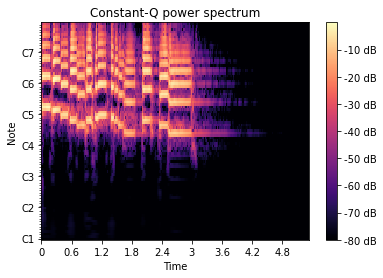

In [16]:
y, sr = librosa.load(librosa.ex('trumpet'))
C = librosa.cqt(y, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")



(84, 100)


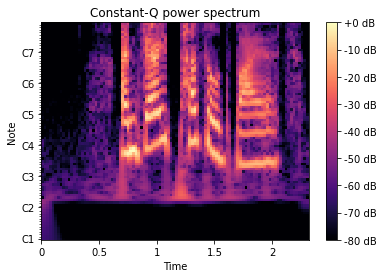

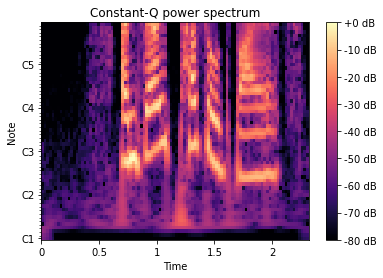

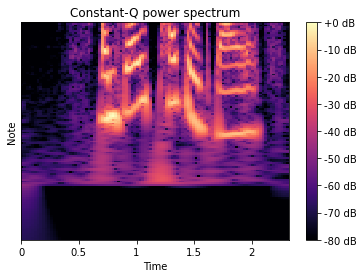

In [21]:
#y, sr = librosa.load(librosa.ex('trumpet'))
y, sr = librosa.load(fulldatasetpath + '/' +filename)

C = np.abs(librosa.cqt(y, sr=sr))
print(C.shape)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'),
                n_bins=60))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

C = np.abs(librosa.cqt(y, sr=sr, 
                n_bins=60 * 2, bins_per_octave=12 * 2))

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")


(60, 100)


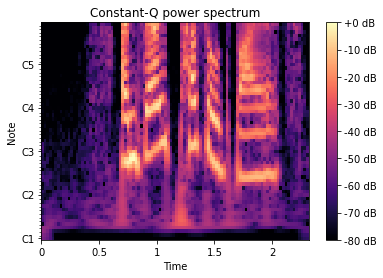

In [13]:
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'),
                n_bins=60))
print(C.shape)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

(120, 100)


/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:1154: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  warnings.warn(


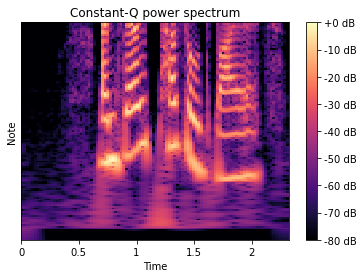

In [14]:
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'),
                n_bins=60 * 2, bins_per_octave=12 * 2))
# C = librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('C2'),
#                 n_bins=60 * 2, bins_per_octave=12 * 2)
print(C.shape)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

# Feature before/after Tranformation (Repeat)

In [28]:
# target_num_rows = 150
target_num_rows = 300

/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


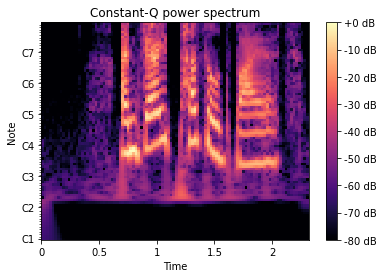

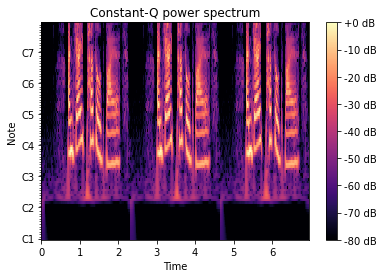

In [29]:
filename = 'LA_T_2361751.flac'
a,sr = extract_features(filename)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(a, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

if(target_num_rows > a.shape[1]):
        # repeat sample
    while(target_num_rows != a.shape[1]):
        a = np.concatenate((a, a[:,:target_num_rows - a.shape[1]]), axis=1)
else:
    #cut  sample
#         print(data.shape)
#         print(filename)
    a = a[:,:target_num_rows] 

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(a, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

## # Feature before/after Tranformation (CUT)

/Users/asimadnan/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


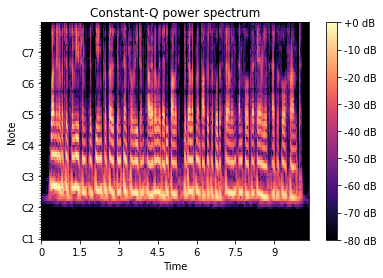

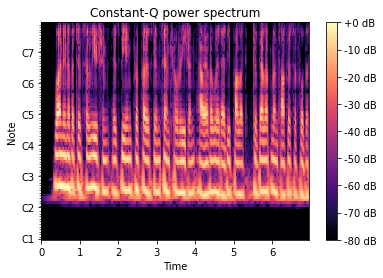

In [30]:
filename = 'LA_T_1051226.flac'
a,sr = extract_features(filename)
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(a, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

if(target_num_rows > a.shape[1]):
        # repeat sample
    while(target_num_rows != a.shape[1]):
        a = np.concatenate((a, a[:,:target_num_rows - a.shape[1]]), axis=1)
else:
    #cut  sample
#         print(data.shape)
#         print(filename)
    a = a[:,:target_num_rows] 

fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(a, ref=np.max),
                               sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)
ax.set_title('Constant-Q power spectrum')
fig.colorbar(img, ax=ax, format="%+2.0f dB")

In [13]:
a.shape

(84, 100)

In [110]:
# np.reshape(a.tolist(),(12,100,1))

In [9]:
features = []

In [34]:
filename2label = {}
for line in open(labels_path):
    line = line.split()
    filename, label = line[1], line[-1]
    filename2label[filename] = label

metadata = pd.read_csv(labels_path, delimiter = " ", header=None)
metadata.columns = ['SPEAKER_ID','AUDIO_FILE_NAME','ENVIRONMENT_ID','ATTACK_ID','KEY']

features = []
target_num_rows = 300
# Iterate through each sound file and extract the features 
for filename in os.listdir(fulldatasetpath):
    class_label = filename2label[filename.split('.')[0]]

    data,sr = extract_features(filename)
    #print(data.shape)
    if(target_num_rows > data.shape[1]):
        # repeat sample
        while(target_num_rows != data.shape[1]):
            data = np.concatenate((data, data[:,:target_num_rows - data.shape[1]]), axis=1)
    else:
        #cut  sample
#         print(data.shape)
#         print(filename)
        data = data[:,:target_num_rows] 
    print(data.shape)
    features.append([data, class_label])

# Convert into a Panda dataframe 
featuresdf = pd.DataFrame(features, columns=['feature','class_label'])

print('Finished feature extraction from ', len(featuresdf), ' files')

(84, 300)
(84, 300)
(84, 300)
(84, 300)
(84, 300)
(84, 300)
(84, 300)
(84, 300)
(84, 300)
Finished feature extraction from  9  files


In [35]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 
yy = yy[:,0]

# split the dataset 
# from sklearn.model_selection import train_test_split 

# x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

(84, 300)

In [37]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

# np.reshape(a,(12,100,1))
num_rows = X[0].shape[0]
num_columns = X[0].shape[1]
num_channels = 1




In [39]:
# num_labels = yy.shape[1]
filter_size = 2

In [40]:
yy

array([1., 1., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [44]:
# x_train_2 = []
# x_test_2 = []
# for u in x_train:
#     x_train_2.append(np.reshape(u, (num_rows, num_columns, num_channels)))

    
# for u in x_test:
#     x_test_2.append(np.reshape(u, (num_rows, num_columns, num_channels)))
    
# x_train_2 = np.asarray(x_train_2)
# x_test_2 = np.asarray(x_test_2)


In [41]:
x_train_2 = []
for u in X:
    x_train_2.append(np.reshape(u, (num_rows, num_columns, num_channels)))
X = np.asarray(x_train_2)

In [42]:
num_rows, num_columns, num_channels

(84, 300, 1)

## Builing Alexnet model

In [56]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(num_rows, num_columns, num_channels)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
])

In [21]:
root_logdir = os.path.join(os.curdir, "logs\\fit\\")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [57]:
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 35, 96)        11712     
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 35, 96)        384       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 17, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 17, 256)       614656    
_________________________________________________________________
batch_normalization_11 (Batc (None, 13, 17, 256)       1024      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 8, 256)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 6, 8, 384)        

In [33]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train_2, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((x_test_2, y_test))

In [52]:
print(x_train_2.shape)
print(y_train.shape)

(4, 120, 150, 1)
(4, 2)


In [58]:
model.fit(x_train_2,y_train,
          epochs=50,
          validation_data=(x_test_2, y_test),
          validation_freq=1,
          callbacks=[tensorboard_cb])

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.9510 - accuracy: 0.5000 - val_loss: 0.7126 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 1s 536ms/step - loss: 0.2212 - accuracy: 1.0000 - val_loss: 0.7144 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 1s 736ms/step - loss: 1.1030 - accuracy: 0.7500 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 1s 610ms/step - loss: 0.0724 - accuracy: 1.0000 - val_loss: 0.6987 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 1s 635ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.6980 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 1s 780ms/step - loss: 0.1328 - accuracy: 1.0000 - val_loss: 0.7004 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 1s 519ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.6984 - val_accuracy: 0.5000
Epo

In [61]:
model.predict(x_test_2)


array([[0.46929604, 0.53070396],
       [0.46370527, 0.5362947 ]], dtype=float32)

In [60]:
y_test

array([[1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
# alexnet on CQT
# cqcc on PA dataset
# make output of ALexnet 1
# listen/ visualise errors
# add code in error analysis to see differences between same speaker and diffretn attacks/ spoof with scores.
